<a href="https://colab.research.google.com/github/hypergraphlab/Hypergraph-Tutorial/blob/main/%5Bpublic%5D_Hypergraph_Lab_(solved).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color = orange> Exploring Higher Order Processing Using Hypergraph Neural Networks

This is a test

To start this lab, save a copy of this colab file and edit that 🙂.

This lab is designed to showcase and familiarise you with the basics of learning on hypergraphs. It will encompass both the theory behind hypergraph networks and putting them into practice.

The lab is split into 4 main parts.

**Part 1**:
* Creating the hypergraph object
* Understand how to work with hypergraph-structure data
* Building a basic HNN for node-level prediction

**Part 2**:
* Comparing hypergraph methods to graph based methods

**Part 3**:
* Creating mini-batches for hypergraphs
* Hypergraphs for graph-level prediction

**Part 4**:
* Hypergraph attention networks

Hopefully these will giving natural breaks in the lab so you may come and go as you need or easily find pieces of code you may need elsewhere.

**Caveat**: This lab has been put together by me, an individual with no formal qualifications or expertise in the field. If you find any mistakes please get in touch!





# 🤷 **Why hypergraphs?**

Hypergraphs allow us to study relationships that go beyond pairwise, relationships that graph structured data fail to capture concisely.

Consider a group of 5 researchers: Ann, Beth, Chris, Dave, and Erica. Ann and Chris write a paper together: ***Theory is all you need (2022)***. Ann was more interested in the theory presented in the paper while Chris was more interested in the applications. Ann collaborated with Beth and Dave developing the theory in the paper: ***Everything goes neural: a general recipe for success (2023)***. Chris collabarates with Dave and Erica to develop the applications of the theory: ***Neural networks for forecasting crocodile attacks (2023)***.

The structure of this network can be easily captured using a hypergraph.

<center>
<img src="https://drive.google.com/uc?export=view&id=14jKa3j3Q6dCz23akR4BuYeG68E2_TY7v"  width="600">
</center>




However, how should we display this in a graph. We can simply connect two authors who have we written a paper together.

<center>
<img src="https://drive.google.com/uc?export=view&id=132DzN4gYLnmct03aOTtb68pQJcUSa6jm"  width="600">
</center>


However, this fails to capture the whole structure of the network and it is unclear who the authors were for a given paper. For example, if Beth and Dave wrote a paper together: ***Neural Networks: where did it all go wrong? (2024)***, the graph would remain the same as before.



Another way we could try to visualise this data using a graph, is to introduce another type of nodes representing each of the papers. Not only does this increase the computational cost of a graph neural network (since there are more nodes to process and store in memory), but this leads to a heterogeneous graph, where nodes have different meaning, things that are slightly unusual for the way we are interpreting graphs in general and processing them is harder than processing usual graphs (there are some papers dedicated to heterogeneous graphs but without great results).

<center>
<img src="https://drive.google.com/uc?export=view&id=1IdIla9RhqLbpf8Po5m_8g_F3JxMbDGgL"  width="600">
</center>







# **😫 Preliminaries**: Install and import modules



❗**Note:** If you receive an error when installing packages, restart the runtime and error should disappear. It should not take longer than 10 minutes to install everything.

In [ ]:
#@title [RUN] install
!pip install -U --force-reinstall numpy
!pip install --force-reinstall dhg
!pip install hypernetx

import torch

!pip install --force-reinstall torch-geometric torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
moviepy 1.0.3 requires decorator<5.0,>=4.0.2, but you have decorator 5.1.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchvision 0.15.2+cu118 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached dhg-0.9.3-py3-none-any.whl (162 kB)
  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached optuna-3.2.0-py3-none-any.whl (390 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Using cached torch-1.13.1-cp310-cp310-manylinux1_x86_64.whl (887.5 MB)
  Using cached typing_extensions-4.6.3-py3-none-any.whl (31 kB)
  Using cached nvidia_cuda_runtime_cu11-11.7.99-py3-none-manylinux1_x86_64.whl (849 kB)
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl (557.1 MB)
  Using cached nvidia_cublas_cu1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu117.html
  Using cached torch_geometric-2.3.1-py3-none-any.whl
  Using cached https://data.pyg.org/whl/torch-1.13.0%2Bcu117/torch_scatter-2.1.1%2Bpt113cu117-cp310-cp310-linux_x86_64.whl (10.1 MB)
  Using cached https://data.pyg.org/whl/torch-1.13.0%2Bcu117/torch_sparse-0.6.17%2Bpt113cu117-cp310-cp310-linux_x86_64.whl (4.7 MB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Us

In [ ]:
#@title [RUN] Import modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import dhg
import pdb
import torch.optim as optim
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import random
import torch_geometric
from torch_scatter import scatter_mean, scatter_max, scatter_sum
from datetime import datetime

 No module named 'celluloid'. If you need to use hypernetx.algorithms.contagion, please install additional packages by running the following command: pip install .['all']
 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


In [ ]:
#@title [RUN] Helper functions
def draw_one_graph(ax, edges, label=None, node_emb=None, layout=None, special_color=False):
    """draw a graph with networkx based on adjacency matrix (edges)
    graph labels could be displayed as a title for each graph
    node_emb could be displayed in colors
    """
    graph = nx.Graph()
    edges = zip(edges[0], edges[1])
    graph.add_edges_from(edges)
    node_pos = layout(graph)
    #add colors according to node embeding
    if (node_emb is not None) or special_color:
        color_map = []
        node_list = [node[0] for node in graph.nodes(data = True)]
        for i,node in enumerate(node_list):
            #just ignore this branch
            if special_color:
                if len(node_list) == 3:
                    crt_color = (1,0,0)
                elif len(node_list) == 5:
                    crt_color = (0,1,0)
                elif len(node_list) == 4:
                    crt_color = (1,1,0)
                else:
                  special_list = [(1,0,0)] * 3 + [(0,1,0)] * 5 + [(1,1,0)] * 4
                  crt_color = special_list[i]
            else:
                crt_node_emb = node_emb[node]
                #map float number (node embeding) to a color
                crt_color = cm.gist_rainbow(crt_node_emb, bytes=True)
                crt_color = (crt_color[0]/255.0, crt_color[1]/255.0, crt_color[2]/255.0, crt_color[3]/255.0)
            color_map.append(crt_color)

        nx.draw_networkx_nodes(graph,node_pos, node_color=color_map,
                        nodelist = node_list, ax=ax)
        nx.draw_networkx_edges(graph, node_pos, ax=ax)
        nx.draw_networkx_labels(graph,node_pos, ax=ax)
    else:
        nx.draw_networkx(graph, node_pos, ax=ax)

def gallery(graphs, labels=None, node_emb=None, special_color=False, max_graphs=4, max_fig_size=(40, 10), layout=nx.layout.kamada_kawai_layout):
    ''' Draw multiple graphs as a gallery
    Args:
      graphs: torch_geometrics.dataset object/ List of Graph objects
      labels: num_graphs
      node_emb: num_graphs* [num_nodes x num_ch]
      max_graphs: maximum graphs display
    '''
    num_graphs = min(len(graphs), max_graphs)
    ff, axes = plt.subplots(1, num_graphs,
                            figsize=max_fig_size,
                            subplot_kw={'xticks': [], 'yticks': []})
    if num_graphs == 1:
        axes = [axes]
    if node_emb is None:
        node_emb = num_graphs*[None]
    if labels is None:
        labels = num_graphs * [" "]


    for i in range(num_graphs):
        draw_one_graph(axes[i], graphs[i].edge_index.numpy(), labels[i], node_emb[i], layout, special_color)
        if labels[i] != " ":
            axes[i].set_title(f"Target: {labels[i]}", fontsize=28)
        axes[i].set_axis_off()
    plt.show()

def update_stats(training_stats, epoch_stats):
    """ Store metrics along the training
    Args:
      epoch_stats: dict containg metrics about one epoch
      training_stats: dict containing lists of metrics along training
    Returns:
      updated training_stats
    """
    if training_stats is None:
        training_stats = {}
        for key in epoch_stats.keys():
            training_stats[key] = []
    for key,val in epoch_stats.items():
        training_stats[key].append(val)
    return training_stats
# epoch_stats = {'train_acc': ep_train_ac, 'val_acc', ep_val_acc, 'train_loss':}
# training_stats = None

def plot_stats(training_stats, figsize=(5, 5), name=""):
    """ Create one plot for each metric stored in training_stats
    """
    stats_names = [key[6:] for key in training_stats.keys() if key.startswith('train_')]
    f, ax = plt.subplots(len(stats_names), 1, figsize=figsize)
    if len(stats_names)==1:
        ax = np.array([ax])
    for key, axx in zip(stats_names, ax.reshape(-1,)):
        axx.plot(
            training_stats['epoch'],
            training_stats[f'train_{key}'],
            label=f"Training {key}")
        axx.plot(
            training_stats['epoch'],
            training_stats[f'val_{key}'],
            label=f"Validation {key}")
        axx.set_xlabel("Training epoch")
        axx.set_ylabel(key)
        axx.legend()
    plt.title(name)

def get_list_of_edges(hypergraph):
  incidence_matrix = hypergraph.incidence_matrix()
  list_of_edges = []
  for i in range(incidence_matrix.shape[-1]):
    current_list = []
    for j in range(incidence_matrix.shape[0]):
      if incidence_matrix[j,i] != 0:
        current_list.append(j)
    list_of_edges.append(current_list)
  return list_of_edges


def visualise(hypergraph):
  list_of_edges = get_list_of_edges(hypergraph)
  list_of_nodes = list(range(hypergraph.num_nodes))
  empty_dic = {}
  i=0
  for current_list in list_of_edges:
    empty_dic[str(i)] = current_list
    i+=1
  for current_node in list_of_nodes:
    empty_dic[str(i)] = [current_node]
    i+=1
  final_graph = hnx.Hypergraph(empty_dic)
  hnx.draw(final_graph)
  plt.title(f'Value = {hypergraph.y}')
  plt.show()

def hnxHyperGraph(hypergraph):
  list_of_edges = get_list_of_edges(hypergraph)
  list_of_nodes = list(range(hypergraph.num_nodes))
  empty_dic = {}
  i=0
  for current_list in list_of_edges:
    empty_dic[str(i)] = current_list
    i+=1
  for current_node in list_of_nodes:
    empty_dic[str(i)] = [current_node]
    i+=1
  final_graph = hnx.Hypergraph(empty_dic)
  return final_graph

def incidence_to_edgeindex(incidence_matrix):
  incidence_matrix = incidence_matrix.to_sparse()
  values = incidence_matrix.values()
  indices = incidence_matrix.indices()

  edge_list = []
  vertex_list = []
  for t in range(int(values.shape[0])):
    for j in range(int(values[t])):
      edge_list.append(indices[1,t])
      vertex_list.append(indices[0,t])
  edge_index = torch.tensor([vertex_list, edge_list])
  return edge_index


##graph object

class Graph(object):
    def __init__(self, edge_index, x, y, weighted = None):
        """ Graph structure
            for a mini-batch it will store a big (sparse) graph
            representing the entire batch
        Args:
            x: node features  [num_nodes x num_feats]
            y: graph labels   [num_graphs]
            edge_index: list of edges [2 x num_edges]
        """
        self.edge_index = edge_index
        self.x = x.to(torch.float32)
        self.y = y
        self.num_nodes = self.x.shape[0]
        if weighted is None:
          self.values = torch.ones(self.edge_index.shape[1])
        else:
          self.values = weighted

    #ignore this for now, it will be useful for batching
    def set_batch(self, batch):
        """ list of ints that maps each node to the graph it belongs to
            e.g. for batch = [0,0,0,1,1,1,1]: the first 3 nodes belong to graph_0 while
            the last 4 belong to graph_1
        """
        self.batch = batch

    # this function returns a sparse tensor
    def get_adjacency_matrix(self):
        """ from the list of edges create
        a num_nodes x num_nodes sparse adjacency matrix
        """
        return torch.sparse.LongTensor(self.edge_index,
                              # we work with a binary adj containing 1 if an edge exist
                              self.values,
                              torch.Size((self.num_nodes, self.num_nodes))
                              ).to_dense()




# <font color = orange> 🐤 **Part 1: The basics of learning on hypergraphs** </font>

# 👶 **What is a hypergraph?**

A **hypergraph** can be viewed as a generalisation of a graph. An edge of a graph is a pair ($2$-tuple) of vertices in that graph. A hyperedge is a unordered $k$-tuple of vertices.

More formally, a **hypergraph** is an ordered pair $\mathcal{H} = (\mathcal{V}, \mathcal{E})$ where $\mathcal{V}$ is a set of vertices/nodes and $\mathcal{E}$ is a set of unordered $k$-tuples of $\mathcal{V}$ for $k\in \{1, 2, …, |\mathcal{V} |\}$, known as **hyperedges**.

**Example**: Consider the following hypergraph which will become our running example.

<center>
<img src="https://drive.google.com/uc?export=view&id=1tN5pjLPZZICfWWrXieJk-oV4aXuSZB97"  width="600">
</center>


We have that $\mathcal{V} = \{v_1, v_2, v_3,v_4,v_5\}$ and $\mathcal{E} = \{ (v_1, v_2), (v_1, v_3, v_4), (v_2, v_4, v_5)\}$.



We can easily represent a hypergraph using matrices. For a hypergraph with $n$ vertices and $m$ hyperedges, $H \in \mathbb{R}^{n \times m}$ is known as the **incidence matrix**. It is defined as
$$   h_{i,j} = \left\{
\begin{array}{ll}
      1 & \text{if }v_i\text{ is in }e_j \\
      0 & \text{otherwise}
\end{array}
\right. $$

Occasionally, one might wish to weight this incidence matrix, this can be done by replacing the value of 1 with a weight, more will be said about this later.

So for our running example, the corresponding incidence matrix is $$ H =\begin{pmatrix}
1 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 0 \\
0 & 1 & 1 \\
0 & 0 & 1
\end{pmatrix}$$

Unlike in graphs, where you only have a degree for nodes, in hypergraph we have a notion of a degree for an edge as well. The degree of a node in a hypergraph is the number of hyperedges that contain that node. The **node degree matrix** $D_v \in \mathbb{R}^{n\times n}$ is defined as the matrix whose diagonal entry is the column sum of the incidence matrix. Similarly, the degree of a hyperedge is the number of vertices contained in that edge. The **hyperedge degree matrix** $D_e \in \mathbb{R}^{m \times m}$, is the matrix whose diagonal entries are the row sums of the incidence matrix.


For hypergraphs with node features, each node $v_i \in \mathcal{V}$ has an associated $d$-dimensional feature vector $\mathbf{x_i} \in \mathbb{R}^{d}$. Then the **feature matrix** $\mathbf{X} \in \mathbb{R}^{n \times d}$ can be used to represent the feature vectors for every node in the graph. Can you think of how hyperedge feature matrix could be defined?

# 🎒 Learning on hypergraph structured-data

Machine learning tasks on hypergraph structured data can be categorised based on the nuanced differences of the dataset and the task being studied. Most generally we are interested in the following tasks

- **Node/vertex-level prediction:** a data observation is a node within a hypergraph, we are interested in doing node-level classification/regression. Ex. Cora dataset where we are interested in categorising papers that are nodes of a larger citation network
- **Hyperdge-level prediction:** we are interested in predicting hyperedges between samples in the dataset/ properties of a hyperedge.
- **Hypergraph-level prediction:** a data observation is a hypergraph, i.e. our dataset consists of several hypergraphs and we are interested in hypergraph-level  classification/regression, ie a single output for the entire hypergraph.

In the first part of this lab we will start with a node prediction task while the second part tackles a hypergraph level prediction.

<center>
<img src="https://drive.google.com/uc?export=view&id=1EeqLBuaboXPxi6oceQTFgiZUdUoY37DR"  width="800">
<center>


# 🤖 **Creating a hypergraph object**

To store data about the hypergraph we are going to create the following `HyperGraph` class.


The `HyperGraph` class stores the hypergraph according to its  'hyper edge index', which is a tensor of size `[2, k]` where $$ k = \sum_{e \in \mathcal{E}}\sum_{v \in e} 1 .$$

Where the $i$'th column, $ x = [v_r, e_j]$ represent that $v_r \in e_j$.

**Example** Going back to our running example. We would represent our hypergraph as

$$\begin{bmatrix}
0 & 1 & 0 & 2 & 3 & 1 & 3 & 4 \\
0 & 0 & 1 & 1 & 1 & 2 & 2 & 2
\end{bmatrix} $$

The `HyperGraph` class has a method `incidence_matrix()` which will return the incidence matrix when it is required.

In [ ]:
class HyperGraph(object):
  def __init__(self, hyper_edge_index, x, y):
    """ HyperGraph structure
            for a mini-batch it will store a big hypergraph
            representing the entire batch
        Args:
            x: node features  [num_nodes x num_feats]
            y: hypergraph labels   [num_hyper_graphs]
            hyper_edge_index: list of hyperedges [2, k] where k is defined in
            the above cell.
        """
    self.hyper_edge_index = hyper_edge_index
    self.x = x.to(torch.float32)
    self.y = y
    self.num_nodes = self.x.shape[0] ##number of nodes
    self.num_hyper_edges = self.hyper_edge_index[1,:].max().item()+1 #number of hyper edges

  #this will be useful later, but we can ignore it for now
  def set_batch(self, batch):
    self.batch = batch


  #returns the incidence matrix H
  def incidence_matrix(self):
    return torch.sparse.LongTensor(self.hyper_edge_index,
                              # we work with a binary incidence containing 1 if an edge exist
                              torch.ones((self.hyper_edge_index.shape[1])),
                              torch.Size((self.num_nodes, self.num_hyper_edges))
                              ).to_dense()



As an aside, we are also able to draw hypergraphs in python. It took us sometime to find a good drawing package but we finally decided this one is quite nice, with the minor annoyance that you need to have every vertex in at least one hyperedge. Documentation can be found [here](https://pnnl.github.io/HyperNetX/index.html). Let us visualise a hypergraph now and look at it's incidence matrix.

/usr/local/lib/python3.10/dist-packages/hypernetx/classes/entity.py:1387: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
/usr/local/lib/python3.10/dist-packages/hypernetx/classes/entity.py:1390: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties[self._misc_props_col] = self.properties[
/usr/local/lib/python3.10/dist-packages/hypernetx/classes/entity.py:1387: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
/usr/local/lib/python3.10/dist-packages/hypernetx/classes/entity.py:1390: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties[self._misc_props_col] = self.properties[


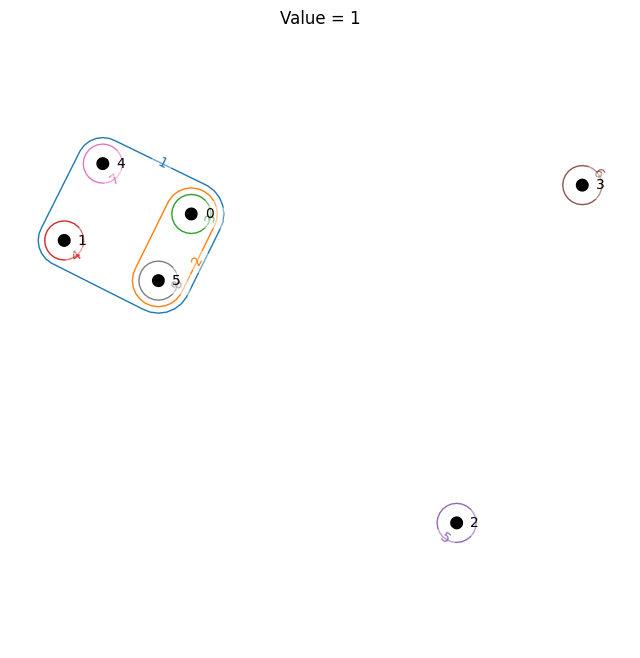

The incidence matrix of this hypergraph is 
 tensor([[0., 1., 2.],
        [0., 1., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 1., 0.],
        [0., 1., 2.]])


In [ ]:
num_vertices = 6
num_edges = 3
num_features = 16
n=8
x = torch.rand((6,3))
y = 1
incidence_matrix = torch.concat((torch.randint(0, num_vertices, (1,n)), torch.randint(0, num_edges, (1,n))), dim = 0)
random_hypergraph = HyperGraph(incidence_matrix, x, y)

visualise(random_hypergraph)
print(f'The incidence matrix of this hypergraph is \n {random_hypergraph.incidence_matrix()}')

Let us now look the corresponding `hyper_edge_index`. Is it as you would expect?

In [ ]:
random_hypergraph.hyper_edge_index

tensor([[0, 0, 5, 5, 1, 5, 0, 4],
        [2, 1, 2, 2, 1, 1, 2, 1]])

# 📖 **CoAuthorshipCora Dataset**

For the first part of this lab, we will be working with the CoAuthorship cora dataset. CoauthroshipCora is a citation network used for node classification.

Similarly for the Cora dataset for graphs, CoAuthorshipCora is a citation network of 2708 papers and our goal is to classify them into 7 categories. Each paper is characterised by a 1433 dimensional bag-of-words. All documents co-authored by a specific author form a hyperedge.

We will be working with the CoAuthroshipCora (the name CoCora will be used interchangably) through a `CoCoraHyperDataset` which, currently, has methods to turn the data into a hypergraph.

In [ ]:
dataset = dhg.data.CoauthorshipCora(data_root='')

class CoCoraHyperDataset(object):
  def __init__(self, Dataset):
    """
    Dataset is a dhg object storing CoCora data. We will convert it to a
    hypergraph, graph, and weighted graph. Using clique and weighted clique
    expansion respectively (more on this later).
    """
    self.train_mask = Dataset['train_mask']
    self.val_mask = Dataset['val_mask']
    self.test_mask = Dataset['test_mask']
    self.features = Dataset['features']
    self.num_vertices = Dataset['features'].shape[0]
    self.labels = Dataset['labels']
    self.edge_list = Dataset['edge_list']

    ## Creating the hypergraph from the data
    self.edge_index = self.edge_list_2_index(self.edge_list)
    self.hyper_graph = HyperGraph(self.edge_index, self.features, self.labels)


    #creating a graph for the data
    self.graph_edge_index = self.edge_list_2_graph_index(self.edge_list)
    self.graph = Graph(self.graph_edge_index, self.features, self.labels)

    #creating a graph using weighted clique expansion
    self.wgraph_edge_index, self.wgraph_weights = self.edge_list_2_weighted_edge_index(self.edge_list, self.features.shape[0])
    self.wgraph = Graph(self.wgraph_edge_index, self.features, self.labels, self.wgraph_weights)

  def edge_list_2_index(self, edge_list):
    """
    Args
      edge_list : a list of lists each representing nodes forming hyperedge
    returns :
      hyper_edge_index : tensor containing indices of incidence matrix [2, k]
      where k is number of non-zero values in incidence matrix
    """
    index = 0
    hyper_vertices_list = []
    hyper_edges_list = []
    for i in edge_list:
      for j in range(len(i)):
        hyper_edges_list+=[index]
      hyper_vertices_list+=i
      index+=1
    hyper_edge_index = torch.tensor([hyper_vertices_list, hyper_edges_list])
    return hyper_edge_index

  def edge_list_2_graph_index(self, edge_list):
    """
    function that creates adjacency matrix associated to clique expansion of
    hypergraph
    Args
      edge_list : a list of lists each representing nodes forming hyperedge
    returns :
      edge_index: tensor containing indices of adjacency matrix [2, k] where k
      is number of non-zero values in adjacency matrix
    """
    source_list = []
    dest_list = []
    for current_edges in edge_list:
      # for every hyperedge draw an edge between every distinct pair of nodes
      n = len(current_edges)
      for i in range(n):
        for j in range(n):
          if i==j:
            continue
          source_list.append(current_edges[i])
          dest_list.append(current_edges[j])
    edge_index = torch.tensor([source_list, dest_list])
    return edge_index

  def edge_list_2_weighted_edge_index(self, edge_list, num_vertices):
    """
    function that creates adjacency matrix associated to weighted clique
    expansion of hypergraph
    Args:
      edge_list : a list of lists each representing nodes forming hyperedge
    returns :
      index: tensor containing indices of adjacency matrix [2, k] where k is
      number of non-zero values in adjacency matrix
      vals: weight associated to each edge
    """
    adjacency_matrix = torch.zeros((num_vertices, num_vertices))
    for current_edges in edge_list:
      # for every hyperedge draw an edge between every pair of nodes
      # for each pair of nodes the weight corresponds to number hyperedges they
      # have in common
      for i in current_edges:
        for j in current_edges:
          # this can be done with HH^T and subtracting degree matrix
          adjacency_matrix[i,j] += 1
    adjacency_matrix = adjacency_matrix.to_sparse()
    index = adjacency_matrix.indices()
    vals = adjacency_matrix.values()

    return index,vals


Data = CoCoraHyperDataset(dataset)

# 🚀 **Our first HGNN**



We construct a layer of our [hypergraph neural network](https://arxiv.org/abs/1809.09401) by first creating a representation for each hyperedge. This is typically done by summing or averaging the node representations for all nodes contained in the hyperedge. Then, for each node we typically sum or average the representations of all hyperedges that contain this node, before combinging that with our original node representation.

Mathematically, this can be written as $$HH^TXW,$$ where $W$ is our learnable linear projection.

❓**Can you convince yourself of this?**


In practice we normalise the projections to avoid exploding numerics so a  layer of HGNN is $$ D_v^{-\frac{1}{2}} H D_e^{-1} H^T D_v^{-\frac{1}{2}}XW.$$

Once again $D_v$ is the node degree matrix and $D_e$ is the hyperedge degree matrix.

<center>
<img src="https://drive.google.com/uc?export=view&id=1-tvxWm5USdCxxvlCVqskM3qGKcV492dW"  width="800">
<center>



In [ ]:
class HyperNNLayer(nn.Module):
  def __init__(self, input_dim, output_dim):
    """
    One layer of hypergraph neural network

    Args:
      input_dim : number of features of each node in hyergraph
      output_dim : number of output features
    """
    super(HyperNNLayer, self).__init__()
    self.input_dim = input_dim
    self.output_dim = output_dim
    self.Linear = nn.Linear(input_dim,output_dim)

  def forward(self, x,H):
    """
    Args:
      x : feature matrix [num_nodes, input_dim]
      H : incidence matrix [num_nodes, num_hyper_edges]
    returns:
      x : output of one layer of hypergraph neural network [num_nodes, output_dim]
    """
    # compute degree of nodes (D_v)^-0.5
    degree_of_nodes = torch.nan_to_num(torch.pow(torch.diag(torch.sum(H, dim=-1)), -0.5), nan=0, posinf=0, neginf=0).to(torch.float32)
    # compute degree of hyper edges (D_e)^-1
    degree_of_edges = torch.nan_to_num(torch.pow(torch.diag(torch.sum(H, dim=0)), -1.0), nan=0, posinf=0, neginf=0).to(torch.float32)


    # compute D_v^-0.5 H D_e^-1 H^T D_v^-0.5 x
    x = degree_of_nodes @ x
    x = torch.transpose(H, 0, 1) @ x
    x = degree_of_edges @ x
    x = H @ x
    x = degree_of_nodes @ x

    #apply linear layer
    x = self.Linear(x)
    return x

class HyperNN(nn.Module):
  def __init__(self, input_dim, output_dim, hidden_dim, num_layers):
    """
    Hypergraph neural network containing num_layers HyperNNLayer

    Args:
      input_dim : number of features of each node in hyergraph
      output_dim : number of output features
      hidden_dim : hidden dimension
      num_layers : number of layers
    """
    super(HyperNN, self).__init__()
    self.input_dim = input_dim
    self.output_dim = output_dim
    self.hidden_dim=hidden_dim

    if num_layers > 1:
      self.hnn_layers = [HyperNNLayer(input_dim, hidden_dim)]
      self.hnn_layers+= [HyperNNLayer(hidden_dim, hidden_dim) for i in range(num_layers-2)]
      self.hnn_layers+= [HyperNNLayer(hidden_dim, output_dim)]
    else:
      self.hnn_layers = [HyperNNLayer(input_dim, output_dim)]

    self.hnn_layers = nn.ModuleList(self.hnn_layers)
    self.num_layers = num_layers

  def forward(self,hgraph):
    """
    Args:
      hgraph : input hypergraph stored as HyperGraph class
    returns:
      y_hat : logits for each node [num_nodes, output_dim]
    """
    H = hgraph.incidence_matrix()

    x = hgraph.x.to(torch.float32)
    for j in range(self.num_layers-1):
      x = self.hnn_layers[j](x,H)
      x=F.relu(x)
    x = self.hnn_layers[self.num_layers-1](x, H)
    y_hat = x
    return y_hat

In [ ]:
# @title ✅ [RUN] **Please run this unit test to validate your code. You might still have bugs but this is a good sanity check.**
def testing_hnn():
  torch.random.manual_seed(0)
  np.random.seed(0)

  input_dim = 64
  output_dim = 128
  #A = torch.tensor([[0, 1, 1, 0], [1, 0, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0]])
  H = random_hypergraph.incidence_matrix()
  model = HyperNNLayer(input_dim, output_dim)

  x = torch.rand(H.shape[0], input_dim)
  out = model(x, H)

  assert(out.shape == (H.shape[0], output_dim)), "Oups! 🤭 Output shape is wrong"

  np.random.seed(0)
  perm_x = torch.tensor(np.random.permutation(x.numpy()))
  np.random.seed(0)
  perm_out = torch.tensor(np.random.permutation(out.detach().numpy()))

  np.random.seed(0)
  A_perm = np.random.permutation(H.detach().numpy().transpose()).transpose()
  np.random.seed(0)
  A_perm = torch.tensor(np.random.permutation(A_perm))

  torch.random.manual_seed(0)
  model_perm = HyperNNLayer(input_dim, output_dim)

  out_model_perm = model_perm(perm_x, A_perm)

  assert (torch.allclose(perm_out, out_model_perm, atol=1e-6)), "🤔 Something is wrong in the model! You are not permuation equivariant anymore 🥺"
  print("All good!")

testing_hnn()
np.random.seed(None)
torch.random.manual_seed(datetime.now().timestamp())

All good!


Now that you have written your hypergraph neural network, it is time to train it.

In [ ]:
NUM_EPOCHS = 50 #@param {type:"integer"}
LR = 0.001 #@param {type:"number"}
num_runs = 3




In [ ]:
def quick_accuracy(y_hat, y):
  """
  Args :
    y_hat : logits predicted by model [n, num_classes]
    y : ground trutch labels [n]
  returns :
    average accuracy
  """
  n = y.shape[0]
  y_hat = torch.argmax(y_hat, dim=-1)
  accuracy = (y_hat==y).sum().data.item()
  return accuracy/n



In [ ]:
def trainCoCora(hypergraph, model, mask, optimiser):
  model.train()
  y = hypergraph.y[mask]
  optimiser.zero_grad()
  y_hat = model(hypergraph)[mask] #only make predicitions for the ones we know the labels of
  loss = F.cross_entropy(y_hat, y)
  loss.backward()
  optimiser.step()
  return loss.data

def evalCoCora(hypergraph, model, mask):
  model.eval()
  y = hypergraph.y[mask]
  y_hat = model(hypergraph)[mask]
  accuracy = quick_accuracy(y_hat, y)
  return accuracy

def train_eval_loop_CoCora(model, hypergraph, train_mask,
                           valid_mask, test_mask):
    optimiser = optim.Adam(model.parameters(), lr=LR)
    training_stats = None
    # Training loop
    for epoch in range(NUM_EPOCHS):
        train_loss = trainCoCora(hypergraph,model, train_mask, optimiser)
        train_acc = evalCoCora(hypergraph, model,train_mask)
        valid_acc = evalCoCora(hypergraph, model, valid_mask)
        if epoch % 10 == 0:
            print(f"Epoch {epoch} with train loss: {train_loss:.3f} train accuracy: {train_acc:.3f} validation accuracy: {valid_acc:.3f}")
        # store the loss and the accuracy for the final plot
        epoch_stats = {'train_acc': train_acc, 'val_acc': valid_acc, 'epoch':epoch}
        training_stats = update_stats(training_stats, epoch_stats)
    # Lets look at our final test performance
    test_acc = evalCoCora(hypergraph, model, test_mask)
    print(f"Our final test accuracy for the SimpleGNN is: {test_acc:.3f}")
    return training_stats


🍵 **Tea break**: This will take a while to train, grab a cup of tea.

Epoch 0 with train loss: 1.947 train accuracy: 0.143 validation accuracy: 0.129
Epoch 10 with train loss: 1.937 train accuracy: 0.143 validation accuracy: 0.129
Epoch 20 with train loss: 1.923 train accuracy: 0.514 validation accuracy: 0.389
Epoch 30 with train loss: 1.903 train accuracy: 0.650 validation accuracy: 0.518
Epoch 40 with train loss: 1.878 train accuracy: 0.629 validation accuracy: 0.534
Our final test accuracy for the SimpleGNN is: 0.552


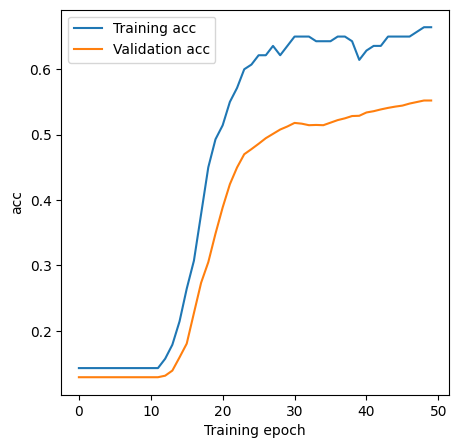

In [ ]:
HyperNNModel = HyperNN(1433, 7, 128, 2)
# Data.hyper_graph stores our hypergraph structure
hyperNNModelOut = train_eval_loop_CoCora(HyperNNModel, Data.hyper_graph,
                                         Data.train_mask, Data.val_mask,
                                         Data.test_mask)
plot_stats(hyperNNModelOut)

# ↩ **Part 2**: From  hypergraphs back to graphs

We want to compare our new hypergraph model to the standard graph processing. But now comes the problem of converting a hypergraph to a graph.

We will present two ways of doing it here, known as **clique expansion** and **weighted clique expansion**.

In clique expansion, we turn each hyperedge into a fully connected graph.

In weighted clique expansion, we turn each hyperedge into a fully connected graph. However, different from clique expansion, the weight on the edge between vertex i and vertex j, is the number of hyperedges they have in common. This reduces the loss of information. Consider the adjacency matrix for the graph created by weighted clique expansion $A$. Then notice that $$ A = HH^T - D_v.$$ Therefore, HGNN is equivalent to [GCN](https://arxiv.org/abs/1609.02907) if we transform the hypergraph to a graph using weighted clique expansion, provided we add weighted self-loops.

❓Convince yourself that the above statement is indeed true.
<center>
<img src="https://drive.google.com/uc?export=view&id=16xYXYbWWX9g-YEtPxjTKPpWah_SjPauo"  width="800">
<center>



To store information about each graph, we create the following ` Graph` class. Note that, instead of storing an entire adjacency matrix to describe the graph structure, we will store it more efficiently as a list of edges of shape `[2, num_edges]`, were for each edge we store the indices of the source and destination node.

In [ ]:
##graph object

class Graph(object):
    def __init__(self, edge_index, x, y, weighted = None):
        """ Graph structure
            for a mini-batch it will store a big (sparse) graph
            representing the entire batch
        Args:
            x: node features  [num_nodes x num_feats]
            y: graph labels   [num_graphs]
            edge_index: list of edges [2 x num_edges]
        """
        self.edge_index = edge_index
        self.x = x.to(torch.float32)
        self.y = y
        self.num_nodes = self.x.shape[0]
        if weighted is None:
          self.values = torch.ones(self.edge_index.shape[1])
        else:
          self.values = weighted

    #ignore this for now, it will be useful for batching
    def set_batch(self, batch):
        """ list of ints that maps each node to the graph it belongs to
            e.g. for batch = [0,0,0,1,1,1,1]: the first 3 nodes belong to graph_0 while
            the last 4 belong to graph_1
        """
        self.batch = batch

    # this function returns a sparse tensor
    def get_adjacency_matrix(self):
        """ from the list of edges create
        a num_nodes x num_nodes sparse adjacency matrix
        """
        return torch.sparse.LongTensor(self.edge_index,
                              # we work with a binary adj containing 1 if an edge exist
                              self.values,
                              torch.Size((self.num_nodes, self.num_nodes))
                              ).to_dense()

In [ ]:
class GCNLayer(nn.Module):
  def __init__(self,input_dim, output_dim):
    super(GCNLayer, self).__init__()
    self.input_dim =input_dim
    self.output_dim = output_dim
    """GCN layer to be implemented by students of practical

    Args:
        input_dim (int): Dimensionality of the input feature vectors
        output_dim (int): Dimensionality of the output softmax distribution
        A (torch.Tensor): 2-D adjacency matrix
    """


    self.linear = nn.Linear(input_dim, output_dim)
        # =========================================

  def forward(self, x, A):

      D = torch.nan_to_num(torch.pow(torch.diag(torch.sum(A, dim=0)), -0.5), nan=0, posinf=0, neginf=0)
      self.adj_norm = D@A@D
      x = self.adj_norm@x
      x=self.linear(x)
      return x

class GNN(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
    """
    Graph convolutional network containing num_layers GCNLayer

    Args:
      input_dim : number of features of each node in graph
      output_dim : number of output features
      hidden_dim : hidden dimension
      num_layers : number of layers
    """
    super(GNN, self).__init__()
    self.input_dim = input_dim
    self.output_dim = output_dim
    if num_layers > 1:
      self.gcn_layers = [GCNLayer(input_dim, hidden_dim)]
      self.gcn_layers += [GCNLayer(hidden_dim, hidden_dim) for i in range(num_layers-2)]
      self.gcn_layers += [GCNLayer(hidden_dim, output_dim)]
    else:
      self.gcn_layers = [GCNLayer(input_dim, output_dim)]

    self.gcn_layers = nn.ModuleList(self.gcn_layers)
    self.num_gcn_layers = num_layers

  def forward(self, graph):
    """
    Args:
      graph : input graph stored as Graph class
    returns:
      y_hat : logits for each node [num_nodes, output_dim]
    """
    x = graph.x.to(torch.float32)
    A = graph.get_adjacency_matrix()
    for j in range(self.num_gcn_layers-1):
      x = self.gcn_layers[j](x, A)
      x = F.relu(x)
    x = self.gcn_layers[-1](x,A)
    y_hat = x
    return y_hat

🍵 **Tea break**: This will take a while to train, grab a cup of tea.

Epoch 0 with train loss: 1.947 train accuracy: 0.143 validation accuracy: 0.108
Epoch 10 with train loss: 1.936 train accuracy: 0.143 validation accuracy: 0.108
Epoch 20 with train loss: 1.922 train accuracy: 0.229 validation accuracy: 0.118
Epoch 30 with train loss: 1.902 train accuracy: 0.500 validation accuracy: 0.348
Epoch 40 with train loss: 1.874 train accuracy: 0.593 validation accuracy: 0.473
Our final test accuracy for the SimpleGNN is: 0.530


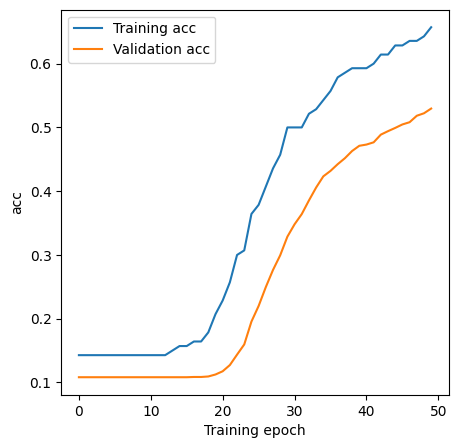

In [ ]:

graph_model = GNN(1433, 128, 7, 2)

# Data.graph stores clique expansion associated to hypergraph
graph_model_out = train_eval_loop_CoCora(graph_model, Data.graph, Data.train_mask, Data.val_mask, Data.test_mask)
plot_stats(graph_model_out)

🍵 **Tea break**: This will take a while to train, grab a cup of tea.

Epoch 0 with train loss: 1.948 train accuracy: 0.143 validation accuracy: 0.129
Epoch 10 with train loss: 1.937 train accuracy: 0.221 validation accuracy: 0.139
Epoch 20 with train loss: 1.924 train accuracy: 0.450 validation accuracy: 0.232
Epoch 30 with train loss: 1.906 train accuracy: 0.600 validation accuracy: 0.427
Epoch 40 with train loss: 1.882 train accuracy: 0.636 validation accuracy: 0.488
Our final test accuracy for the SimpleGNN is: 0.535


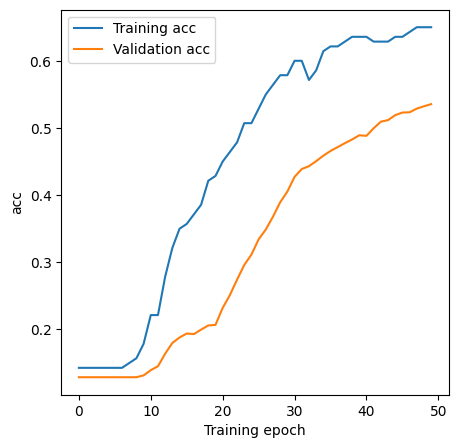

In [ ]:
w_graph_model = GNN(1433, 128, 7, 2)
# Data.wgraph stores weighted clique expansion associated to hypergraph
graph_model_out = train_eval_loop_CoCora(w_graph_model, Data.wgraph, Data.train_mask, Data.val_mask, Data.test_mask)
plot_stats(graph_model_out)

❓**Task**: Can you think of any other ways to convert a hypergraph to a graph?

# 🧬 **Part 3**: Hypergraph level prediction and batching

**Our Dataset**

In this part, we are going to show that hypergraph models can also be a powerful tool for hypergraph level prediction.

Unfortunately, as we are writing this, we are not aware of a benchmarking dataset for hypergraph level prediction. To ameliorate this, we are going to design and building our own dataset.

The dataset `hypergraph_dataset` is a collection of 1000 hypergraphs. Each node of the hypergraph is characterised by 6 features, which have been generated randomly. It is our models task to predict if the hypergraph is connected or not. We say that a hypergraph $\mathcal{H} = (\mathcal{V}, \mathcal{E})$ is **connected** if for any distinct $v_0, v_n \in \mathcal{V}$, there is a sequence $\{v_0, v_1,\dots, v_{n-1}, v_n\}$ such that $v_{i}$ and $v_{i+1}$ belong to the same hyperedge.


Each hypergraph has between 5 and 11 nodes and between 1 and 10 edges. To determine is the hypergraph is connected or not, we are using the `is_connected()` function from the `hypernetx` package, an extremely useful package for all things hypergraphs. Documentation can be found [here](https://pnnl.github.io/HyperNetX/index.html).




In [ ]:
#@title [RUN] Generate dataset
torch.random.manual_seed(0)

Hypergraph_Dataset = []
number_connected = 0
number_not_connected = 0
number_of_hgraphs = 1000
for j in range(number_of_hgraphs):
  num_vertices = torch.randint(5, 11, (1,1)).item() # select number of nodes uniformly between 5 and 11
  num_edges = torch.randint(1,10, (1,1)).item() # select number of hyper edges uniformly between 5 and 11
  nnz = torch.randint(num_edges, num_vertices*num_edges, (1,1)).item() # number of nnz in incidence matrix

  X = torch.rand((num_vertices, 6)) # randomly generate features
  y = torch.rand(1) # dummy label

  #randomly generate incidence matrix
  hyper_edge_index = torch.concat((torch.randint(0, num_vertices, (1,nnz)),
                                   torch.randint(0, num_edges, (1,nnz))), dim = 0)

  #create hypergraph as hnxHyperGraph to check connectivity
  hypergraph = hnxHyperGraph(HyperGraph(hyper_edge_index, X, y))

  #check if hypergraph is connected or not
  if hypergraph.is_connected() == True:
    number_connected +=1
    # assign label of 1 if connected
    Hypergraph_Dataset.append(HyperGraph(hyper_edge_index, X,  torch.tensor(1)))
  else:
    number_not_connected +=1
    # assign label of 0 if not connected
    Hypergraph_Dataset.append(HyperGraph(hyper_edge_index, X,  torch.tensor(0)))


print(f'Number of connected hypergraphs in our dataset = {number_connected} out of {1000} hypergraphs')


Number of connected hypergraphs in our dataset = 437 out of 1000 hypergraphs


Let us visualise the 11'th hypergraph in our dataset together with our label.

In [ ]:
visualise(Hypergraph_Dataset[10])
print(Hypergraph_Dataset[10].incidence_matrix().shape)

In [ ]:
# Hypergraph_Dataset

## We now need to split our dataset into testing, training and validation subset

train_data = Hypergraph_Dataset[0:700]
validation_data = Hypergraph_Dataset[700:850]
test_data = Hypergraph_Dataset[850:]

torch.Size([9, 9])


⛵ **Batching**

Similar to any other deep learning field, when doing hypergraph level prediction, it is good practice to process these in batches. But how do we build these batches?

One solution for this is to create a single *sparse* hypergraph as the union of all the hypergraphs in the batch as follow:

1. stack the features $x$ for all the nodes in all the hypergraphs
2. stack the labels $y$ for all the nodes in all the hypergraphs
3. stack all the incidence matrices $H_i$ as diagonal blocks in the new incidence matrix

This way, we will obtain a new hypergraph containing $\sum_{i=1}^{B}|V_i|$ nodes, where $B$ is the batch_size and by $|V_i|$ we denote the number of nodes in hypergraph $i$. Note that since **no** hyperedges connect nodes from different hypergraphs,  the  information propagation will not be affected by the way we store it.

<center>
<img src="https://drive.google.com/uc?export=view&id=1B5dBPog-H839dqK7FkHX_h5gKShhBKRb"  width="800">
<center>




In [ ]:
def create_mini_batch(hgraph_list) -> Graph:
    """ Built a sparse graph from a batch of graphs
    Args:
        graph_list: list of Graph objects in a batch
    Returns:
        a big (sparse) Graph representing the entire batch
    """
    #insert first graph into the structure
    batch_edge_index = hgraph_list[0].hyper_edge_index
    batch_x = hgraph_list[0].x
    batch_y = [hgraph_list[0].y.item()]
    batch_batch = torch.zeros((hgraph_list[0].num_nodes), dtype=torch.int64)
    num_nodes=hgraph_list[0].num_nodes
    num_hyper_edges = hgraph_list[0].num_hyper_edges

    #append the rest of the graphs to the structure
    for idx, graph in enumerate(hgraph_list[1:]):
        # concat the features
        batch_x = torch.concat([batch_x, graph.x], dim=0)
        # concat the labels
        batch_y.append(graph.y.item())

        # concat the adjacency matrix as a block diagonal matrix
        current_hyper_edge_index = graph.hyper_edge_index[1,:] + num_hyper_edges
        current_node_index = graph.hyper_edge_index[0,:] + num_nodes
        current_index = torch.concat([current_node_index.unsqueeze(0), current_hyper_edge_index.unsqueeze(0)], dim=0)
        num_nodes+=graph.num_nodes
        num_hyper_edges+=graph.num_hyper_edges



        batch_edge_index = torch.concat([batch_edge_index, current_index], dim = 1)
        # ==========================================

        # create the array of indexes mapping nodes in the batch-graph
        # to the graph they belong to
        # specify the mapping between the new nodes and the graph they belong to (idx+1)
        batch_batch = torch.concat([batch_batch, (idx+1)*torch.ones([graph.num_nodes]).to(torch.int64)])
        # ==========================================
        pass

    #create the big sparse graph
    batch_graph = HyperGraph(batch_edge_index, batch_x, torch.tensor(batch_y))
    #attach the index array to the Graph structure
    batch_graph.set_batch(batch_batch)
    # print(batch_batch.dtype)
    return batch_graph

Let's visualise a few of the graphs turned into a larger batch of graphs.

torch.Size([7, 1])
torch.Size([7, 3])
torch.Size([7, 3])


/usr/local/lib/python3.10/dist-packages/hypernetx/classes/entity.py:1387: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
/usr/local/lib/python3.10/dist-packages/hypernetx/classes/entity.py:1390: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties[self._misc_props_col] = self.properties[
/usr/local/lib/python3.10/dist-packages/hypernetx/classes/entity.py:1387: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
/usr/local/lib/python3.10/dist-packages/hypernetx/classes/entity.py:1390: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties[self._misc_props_col] = self.properties[


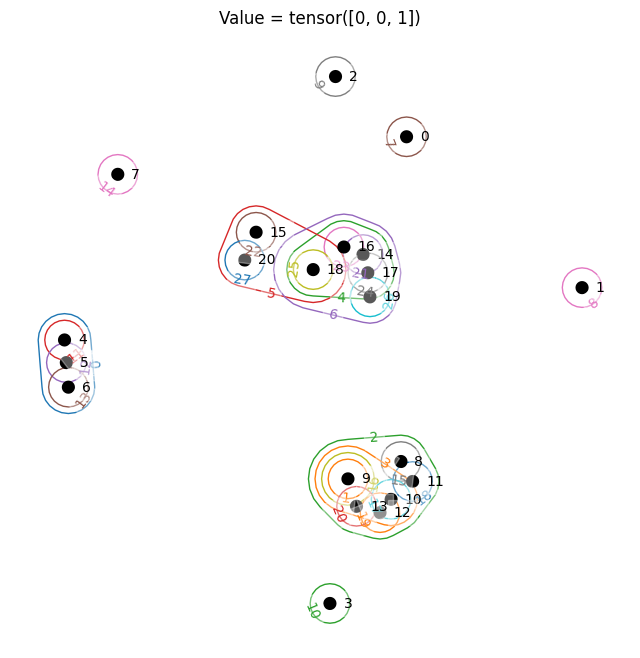

torch.Size([21, 7])


In [ ]:
smaller_list = Hypergraph_Dataset[0:3]
print(smaller_list[0].incidence_matrix().shape)
print(smaller_list[1].incidence_matrix().shape)
print(smaller_list[2].incidence_matrix().shape)

batch_graph = create_mini_batch(smaller_list)
visualise(batch_graph)
print(batch_graph.incidence_matrix().shape)




A simple way of aggregating information from node-level representation to obtain hypergraph-level predictions is by (max/mean/sum) pooling. This can be efficiently obtained using the [`torch_scatter`](https://pytorch-scatter.readthedocs.io/en/1.3.0/functions/mean.html) library containing operations such as `scatter_mean`, `scatter_max`, `scatter_sum`.

 `scatter_*` receives as input a tensor and an array of indices and pools the information in the tensor stored at the indices specified in the array.

 In order to do this, we need to know for every node, what hypergraph it belongs to. This is stored in `batch_batch` variable of our `create_mini_batch` function.

Visualisation for `scatter_sum(array, index)`:

\\

<!-- <center> -->
<img src="https://drive.google.com/uc?export=view&id=16E9Nyd-mPdYBWm923joWKJx4JR8c8pCz" width="600">
<!-- </center> -->

In [ ]:
class GHyperNNLayer(nn.Module):
  def __init__(self, input_dim, output_dim):
    """
    One layer of hypergraph neural network

    Args:
      input_dim : number of features of each node in hyergraph
      output_dim : number of output features
    """
    super(GHyperNNLayer, self).__init__()
    self.input_dim = input_dim
    self.output_dim = output_dim
    self.Linear = nn.Linear(input_dim,output_dim)

  def forward(self, x,H):
    """
    Args:
      x : feature matrix [num_nodes, input_dim]
      H : incidence matrix [num_nodes, num_hyper_edges]
    returns:
      x : output of one layer of hypergraph neural network [num_nodes, output_dim]
    """

    # compute degree of nodes (D_v)^-0.5
    degree_of_nodes = torch.nan_to_num(torch.pow(torch.diag(torch.sum(H, dim=-1)), -0.5), nan=0, posinf=0, neginf=0).to(torch.float32)
    # compute degree of hyper edges (D_e)^-1
    degree_of_edges = torch.nan_to_num(torch.pow(torch.diag(torch.sum(H, dim=0)), -1.0), nan=0, posinf=0, neginf=0).to(torch.float32)

    # compute D_v^-0.5 H D_e^-1 H^T D_v^-0.5 x
    x = degree_of_nodes @ x
    x = torch.transpose(H, 0, 1) @ x
    x = degree_of_edges @ x
    x = H @ x
    x = degree_of_nodes @ x

    #apply linear layer
    x = self.Linear(x)
    return x

class GHyperNN(nn.Module):
  def __init__(self, input_dim, output_dim, hidden_dim, num_layers):
    """
    Hypergraph neural network containing num_layers GHyperNNLayer for hypergraph
    level prediction

    Args:
      input_dim : number of features of each node in hyergraph
      output_dim : number of output features
      hidden_dim : hidden dimension
      num_layers : number of layers
    """
    super(GHyperNN, self).__init__()
    self.input_dim = input_dim
    self.output_dim = output_dim
    self.hidden_dim=hidden_dim

    if num_layers > 1:
      self.hnn_layers = [GHyperNNLayer(input_dim, hidden_dim)]
      self.hnn_layers+= [GHyperNNLayer(hidden_dim, hidden_dim) for i in range(num_layers-2)]
      self.hnn_layers+= [GHyperNNLayer(hidden_dim, output_dim)]
    else:
      self.hnn_layers = [GHyperNNLayer(input_dim, output_dim)]

    self.hnn_layers = nn.ModuleList(self.hnn_layers)
    self.num_layers = num_layers

  def forward(self,hgraph):
    """
    Args:
      hgraph : input hypergraph stored as HyperGraph class formed as a batch
    returns:
      y_hat : logits for each hypergraph in batch [batch_size, output_dim]
    """
    H = hgraph.incidence_matrix()
    x = hgraph.x.to(torch.float32)
    batch = hgraph.batch
    for j in range(self.num_layers-1):
      x = self.hnn_layers[j](x,H)
      x=F.relu(x)
    x = self.hnn_layers[self.num_layers-1](x, H)

    y_hat = scatter_mean(x, batch, dim=0)
    return y_hat

In [ ]:
# @title ✅ [RUN] **Please run this unit test to validate your code. You might still have bugs but this is a good sanity check.**
def testing_hnn():
  torch.random.manual_seed(0)
  np.random.seed(0)

  input_dim = 6
  output_dim = 2
  hidden_dim = 128
  hypergraph = Hypergraph_Dataset[0]
  model = GHyperNN(input_dim, output_dim, hidden_dim, 3)
  # visualise(hypergraph)
  out = model(create_mini_batch([hypergraph]))

  assert(out.shape[-1] ==  output_dim), "Oups! 🤭 Output shape is wrong"

  np.random.seed(0)
  perm_x = torch.tensor(np.random.permutation(hypergraph.x.numpy()))


  H = hypergraph.incidence_matrix()


  np.random.seed(0)
  A_perm = torch.tensor(np.random.permutation(H.numpy()))
  A_perm = incidence_to_edgeindex(A_perm)
  perm_hypergraph = HyperGraph(A_perm, perm_x, hypergraph.y)
  torch.random.manual_seed(0)

  # visualise(perm_hypergraph)
  # visualise(hypergraph)
  out_model_perm = model(create_mini_batch([perm_hypergraph]))


  assert (torch.allclose(out, out_model_perm, atol=1e-4)), "🤔 Something is wrong in the model! You are not permuation invariant anymore 🥺"
  print("All good!")

testing_hnn()
np.random.seed(None)
torch.random.manual_seed(datetime.now().timestamp())

All good!


In [ ]:
BATCH_SIZE = 50 #@param {type:"integer"}
learning_rate = 0.001 #@param {type: "number"}
num_epochs = 10 #@param {type: "integer"}


In [ ]:
def train(dataset, model, optimiser, epoch, loss_fct, metric_fct, print_every = 50):
    """ Train model for one epoch
    """
    model.train()
    num_iter = int(len(dataset)/BATCH_SIZE)
    for i in range(num_iter):
        batch_list = dataset[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        batch = create_mini_batch(batch_list)
        optimiser.zero_grad()
        y_hat= model(batch)
        loss = loss_fct(y_hat, batch.y)
        metric = metric_fct(y_hat, batch.y)
        loss.backward()
        optimiser.step()
        if (i+1) % print_every == 0:
          print(f"Epoch {epoch} Iter {i}/{num_iter}",
                    f"Loss train {loss}; Metric train {metric}")
    return loss, metric

def evaluate(dataset, model, loss_fct, metrics_fct):
    """ Evaluate model on dataset
    """
    model.eval()
    # be careful in practice, as doing this way we will lose some
    # examples from the validation split, when len(dataset)%BATCH_SIZE != 0
    # think about how can you fix this!
    num_iter = int(len(dataset)/BATCH_SIZE)
    metrics_eval = 0
    loss_eval = 0
    for i in range(num_iter):
        batch_list = dataset[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        batch = create_mini_batch(batch_list)


        y_hat = model(batch).to(torch.float32)

        metrics = metrics_fct(y_hat, batch.y)
        loss = loss_fct(y_hat, batch.y)

        metrics_eval += metrics
        loss_eval += loss.detach()
    metrics_eval /= num_iter
    loss_eval /= num_iter
    return loss_eval, metrics_eval

In [ ]:
def train_eval(model, train_dataset, val_dataset, test_dataset,
               loss_fct, metric_fct, print_every=1):
    """ Train the model for NUM_EPOCHS epochs
    """
    #Instantiatie our optimiser
    optimiser = optim.Adam(model.parameters(), lr=learning_rate)
    training_stats = None

    #initial evaluation (before training)
    val_loss, val_metric = evaluate(val_dataset, model, loss_fct, metric_fct)
    train_loss, train_metric = evaluate(train_dataset[:BATCH_SIZE], model,
                                        loss_fct, metric_fct)
    epoch_stats = {'train_loss': train_loss.detach(), 'val_loss': val_loss.detach(),
                      'train_metric': train_metric, 'val_metric': val_metric,
                      'epoch':0}
    training_stats = update_stats(training_stats, epoch_stats)

    for epoch in range(num_epochs):
        if isinstance(train_dataset, list):
            random.shuffle(train_dataset)
        else:
            train_dataset.shuffle()
        train_loss, train_metric = train(train_dataset, model, optimiser, epoch,
                                        loss_fct, metric_fct, print_every)
        val_loss, val_metric = evaluate(val_dataset, model, loss_fct, metric_fct)
        print(f"[Epoch {epoch+1}]",
                    f"train loss: {train_loss:.3f} val loss: {val_loss:.3f}",
                    f"train metric: {train_metric:.3f} val metric: {val_metric:.3f}"
              )
        # store the loss and the computed metric for the final plot
        epoch_stats = {'train_loss': train_loss.detach(), 'val_loss': val_loss.detach(),
                      'train_metric': train_metric, 'val_metric': val_metric,
                      'epoch':epoch+1}
        training_stats = update_stats(training_stats, epoch_stats)

    test_loss, test_metric = evaluate(test_dataset, model,  loss_fct, metric_fct)
    print(f"Test metric: {test_metric:.3f}")
    return training_stats

[Epoch 1] train loss: 0.699 val loss: 0.714 train metric: 0.480 val metric: 0.427
[Epoch 2] train loss: 0.689 val loss: 0.710 train metric: 0.520 val metric: 0.427
[Epoch 3] train loss: 0.689 val loss: 0.706 train metric: 0.520 val metric: 0.427
[Epoch 4] train loss: 0.700 val loss: 0.704 train metric: 0.440 val metric: 0.427
[Epoch 5] train loss: 0.703 val loss: 0.702 train metric: 0.400 val metric: 0.427
[Epoch 6] train loss: 0.711 val loss: 0.699 train metric: 0.360 val metric: 0.427
[Epoch 7] train loss: 0.697 val loss: 0.697 train metric: 0.420 val metric: 0.427
[Epoch 8] train loss: 0.701 val loss: 0.695 train metric: 0.340 val metric: 0.427
[Epoch 9] train loss: 0.693 val loss: 0.693 train metric: 0.420 val metric: 0.427
[Epoch 10] train loss: 0.687 val loss: 0.691 train metric: 0.460 val metric: 0.427
Test metric: 0.427


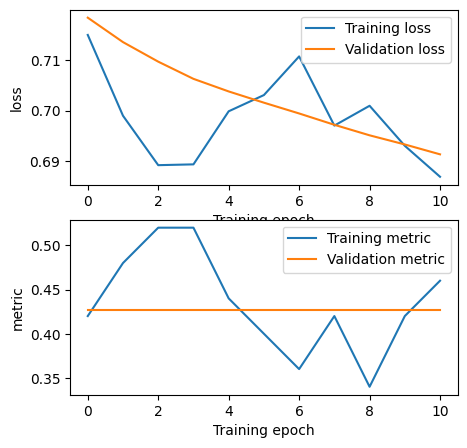

In [ ]:
model = GHyperNN(6, 2, 10, 3)

graph_level_out = train_eval(model, train_data, validation_data, test_data,loss_fct=F.cross_entropy, metric_fct=quick_accuracy, print_every=140)
plot_stats(graph_level_out)

# 🛑 **Part 4**: Adding attention

Attention proved to be beneficial for several architectures such as CNNs, RNNs and GNNs. In this final section, we will demonstrate a technique that allows us to integrate attention to our [hypergraph model](https://arxiv.org/abs/1901.08150).

So far in our HGNN, we have been weighting the contribution from each of the hyperedges that contain a given node equally. The goal of adding attention is to allow the model to learn the weighting for each of them, allowing larger contribution from more 'important' hyperedges and ignoring irrelevant ones.

To predict this new incidence matrix, for each pair containing the representation of a node and the representation of an incident hyperedge we need to predict a score. To do this we use a technique known broadcasting to create a matrix $B$ of size number_of_nodes $\times$ number_of_hyperedges $\times$(number_of_node_features + number_of_hyperedge_features) with $$ B_{i,j} = x_i || e_j $$ where $x_i$ is features of node $i$ and $e_j$ is hyperedge features of hyperedge $j$.



<center>
<img src="https://drive.google.com/uc?export=view&id=1Y6nDj4PYgqPQ8JLYyB1yvuI3he6Mg7kY"  width="800">
</center>



Let's see how it works.





In [ ]:
# Given 2 tensors a and b, we want to generate (a_i || b_j) for all (i,j) pairs
# a: [6, 5]
# b: [10, 7]
# broadcast_a_b -> [6, 10, 5+7]

a = torch.rand((6,5))
b = torch.rand((10,7))

# expand first tensor on the 2nd dimension and second tensor on the 1st dimension
a = a.unsqueeze(1) # a: [6,1,5]
b = b.unsqueeze(0) # b: [1,10,7]

# repeat the expanded dimensions to create tensors having the same dimension everywhere
# except from the dim where the concatenation will happen (last one in our case)
a = a.repeat(1, b.shape[1], 1) # a: [6,10,5]
b = b.repeat(a.shape[0], 1, 1) # b: [6,10,7]

# concatenate the 2 volumes on the last dimension
broadcast_a_b =  torch.concat((a, b), -1) # broadcast_a_b: [6,10,12]

print('Output shape is', broadcast_a_b.shape)

Output shape is torch.Size([6, 10, 12])


We then project these, through a learnable linear layer, into a scalar and used that as a weighted incidence matrix $H_{ij}$.

Often datasets do not come attached with hyperedge features, but this does not mean you cannot apply attention to your model. You will need to infer hyperedge features from the node features. You can do this with any permutation invariant operation, such as sum, max, min, mean.

In [ ]:
class HyperGatLayer(nn.Module):
  def __init__(self, input_dim, output_dim):
    """
    One layer of hypergraph attention neural network

    Args:
      input_dim : number of features of each node in hyergraph
      output_dim : number of output features
    """
    super(HyperGatLayer, self).__init__()
    self.input_dim = input_dim
    self.output_dim = output_dim
    self.final_Linear = nn.Linear(input_dim, output_dim)
    self.mlp1 = nn.Linear(2*input_dim, 2*input_dim)
    self.mlp2 = nn.Linear(2*input_dim, 1)

  def forward(self, H, x):
    """
    Args:
      x : feature matrix [num_nodes, input_dim]
      H : incidence matrix [num_nodes, num_hyper_edges]
    returns:
      x : output of one layer of hypergraph neural network [num_nodes, output_dim]
    """
    num_nodes = x.shape[0]
    num_edges = H.shape[-1]

    # compute degree of nodes (D_v)^-0.5
    degree_of_nodes = torch.nan_to_num(torch.pow(torch.diag(torch.sum(H, dim=-1)), -0.5), nan=0, posinf=0, neginf=0).to(torch.float32)
    # compute degree of hyper edges (D_e)^-1
    degree_of_edges = torch.nan_to_num(torch.pow(torch.diag(torch.sum(H, dim=0)), -1.0), nan=0, posinf=0, neginf=0).to(torch.float32)

    # create features for each hyperedges and put in format for broadcasting
    edge_features = torch.transpose(H, 0, 1) @ x

    # reshape edge features  for broadcasting
    edge_features = edge_features.unsqueeze(0) # [1 x num_edges x input_dim]
    edge_features = edge_features.repeat(num_nodes, 1, 1) # [num_nodes x num_edges x input_dim]

    # put node features in format for broadcasting
    x_1 = x.unsqueeze(1) # [num_nodes x 1 x input_dim]
    x_1 = x_1.repeat(1, num_edges, 1) # [num_nodes x num_edges x input_dim]

    # concatenate node and hyperedge features
    concat_features = torch.concat((x_1, edge_features), -1)

    # apply MLP to obtain a scalar score for each(node, hedge pair)
    H_tilda = self.mlp2(F.relu(self.mlp1(concat_features))).squeeze(-1)
    # mask the weighted incidence matrix with the original H
    H_tilda = F.sigmoid(H_tilda)*H

    # compute the product replacing H with H_tilda and apply linear layer
    product = degree_of_nodes @ H_tilda @ degree_of_edges @ torch.transpose(H_tilda, 0,1) @degree_of_nodes
    projection = self.final_Linear(x)
    x = product @ projection
    return x


class HyperGat(nn.Module):
  def __init__(self, input_dim, output_dim, hidden_dim, num_layers):
    """
    Hypergraph neural network containing num_layers GHyperNNLayer for hypergraph
    level prediction

    Args:
      input_dim : number of features of each node in hyergraph
      output_dim : number of output features
      hidden_dim : hidden dimension
      num_layers : number of layers
    """
    super(HyperGat, self).__init__()
    self.input_dim = input_dim
    self.output_dim = output_dim
    self.hidden_dim=hidden_dim

    if num_layers > 1:
      self.hnn_layers = [HyperGatLayer(input_dim, hidden_dim)]
      self.hnn_layers+= [HyperGatLayer(hidden_dim, hidden_dim) for i in range(num_layers-2)]
      self.hnn_layers+= [HyperGatLayer(hidden_dim, output_dim)]
    else:
      self.hnn_layers = [HyperGatLayer(input_dim, output_dim)]

    self.hnn_layers = nn.ModuleList(self.hnn_layers)
    self.num_layers = num_layers

  def forward(self,hgraph):
    """
    Args:
      hgraph : input hypergraph stored as HyperGraph class formed as a batch
    returns:
      y_hat : logits for each hypergraph in batch [batch_size, output_dim]
    """
    x = hgraph.x
    y = hgraph.y
    H = hgraph.incidence_matrix()
    batch = hgraph.batch

    for j in range(self.num_layers-1):
      x = self.hnn_layers[j](H, x)
      x = F.relu(x)
    x = self.hnn_layers[-1](H,x)
    y_hat = scatter_mean(x, batch, dim=0)
    return y_hat

In [ ]:
# @title ✅ [RUN] **Please run this unit test to validate your code. You might still have bugs but this is a good sanity check.**
def testing_hnn():
  torch.random.manual_seed(0)
  np.random.seed(0)

  input_dim = 6
  output_dim = 2
  hidden_dim = 128
  hypergraph = Hypergraph_Dataset[0]
  model = HyperGat(input_dim, output_dim, hidden_dim, 3)
  # visualise(hypergraph)
  out = model(create_mini_batch([hypergraph]))

  assert(out.shape[-1] ==  output_dim), "Oups! 🤭 Output shape is wrong"

  np.random.seed(0)
  perm_x = torch.tensor(np.random.permutation(hypergraph.x.numpy()))


  H = hypergraph.incidence_matrix()


  np.random.seed(0)
  A_perm = torch.tensor(np.random.permutation(H.numpy()))
  A_perm = incidence_to_edgeindex(A_perm)
  perm_hypergraph = HyperGraph(A_perm, perm_x, hypergraph.y)
  torch.random.manual_seed(0)

  # visualise(perm_hypergraph)
  # visualise(hypergraph)
  out_model_perm = model(create_mini_batch([perm_hypergraph]))


  assert (torch.allclose(out, out_model_perm, atol=1e-4)), "🤔 Something is wrong in the model! You are not permuation invariant anymore 🥺"
  print("All good!")

testing_hnn()
np.random.seed(None)
torch.random.manual_seed(datetime.now().timestamp())

In [ ]:
attention_model = HyperGat(6,2, 8, 3)
attention_model_out = train_eval(attention_model, train_data, validation_data,
                                 test_data,loss_fct=F.cross_entropy,
                                 metric_fct=quick_accuracy, print_every=140)
plot_stats(attention_model_out)

# ⭐️Further reading

Hypergraph processing represent a new, fast-growing field of deep learning. This lab aims to guide you through understanding and familiarise yourself with the basics concepts in hypergraph learning. However, researchers works towards developing new, more powerful tools for creating hypergraph representations.

If you are interested in finding more about hypergraphs, here are a selection of recent papers that you might find useful:

[1] *HyperGCN: A New Method of Training Graph Convolutional Networks on Hypergraphs*, Yadati et al, NeurIPS 2019 \\
[2] *HNHN: Hypergraph Networks with Hyperedge Neurons*, Dong et al GRLW 2020 \\
[3] *Unignn: a unified framework for graph and hypergraph neural networks*, Huang et al, IJCAI 2021 \\
[4] *Nonlinear higher-order label spreading*, Tudisco et al, WWW 2021 \\
[5] *You are AllSet: A Multiset Function Framework for Hypergraph Neural Networks*, Chien et al, ICLR 2022 \\
[6] *EvolveHypergraph: Group-Aware Dynamic Relational Reasoning for Trajectory Prediction*, Li et al, CVPR 2022 \\
[7] *Equivariant Hypergraph Diffusion Neural Operators*, Wang et al, ICLR 2023 \\


